<a href="https://colab.research.google.com/github/Ericaakanko/classification-models-for-predicting-aromatase-inhibitors/blob/main/classifcation_ProjectAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/aroma/aromataseUse1.csv')
df



,Molecule ChEMBL ID,Molecular Weight,#RO5,AlogP,Smiles,Standard Type,Standard Value,Activity,Comment
0,CHEMBL3245350,408.61,1,6,C[C@]12CC[C@H]3[C@H]([C@@H]1CCC2=O)[C@H](SCc1c...,Activity,NaN,0,Not Active
1,CHEMBL491602,370.50,1,5.07,CC(C)(C)c1ccc(CN(Cc2cccc3ccccc23)n2cnnc2)cc1,Activity,NaN,0,Not Active
2,CHEMBL3245348,374.59,1,5.6,CCCCS[C@@H]1CC2=CC(=O)CC[C@]2(C)[C@H]2CC[C@]3(...,Activity,NaN,0,Not Active
3,CHEMBL490388,409.32,1,5.59,Clc1ccc(CN(Cc2ccc(-c3ccccc3)cc2)n2cnnc2)c(Cl)c1,Activity,NaN,0,Not Active
4,CHEMBL206175,290.32,0,4.1,COc1cccc(-c2cc(O)c3c(ccc4[nH]ccc43)n2)c1,Activity,NaN,0,Not Active
...,...,...,...,...,...,...,...,...,...
4163,CHEMBL1991089,321.33,0,2.89,COC(=O)c1ccc(NCC2=CC(=O)c3ccccc3C2=O)cc1,Vmax,60.6,1,Active
4164,CHEMBL4474808,291.33,0,0.97,N[C@@H]1CCN(Cc2cc(O)c3cc(F)ccc3n2)C[C@H]1O,Vmax,64.6,1,Active
4165,CHEMBL4453737,312.78,0,2.04,O=C(CCc1ccc(O)c(Cl)c1)NCc1csc(=O)[nH]1,Vmax,78.7,1,Active
4166,CHEMBL1991089,321.33,0,2.89,COC(=O)c1ccc(NCC2=CC(=O)c3ccccc3C2=O)cc1,Vmax,79.3,1,Active


In [ ]:
df1 = df.drop_duplicates(['Smiles'], keep ='first')
df1

,Molecule ChEMBL ID,Molecular Weight,#RO5,AlogP,Smiles,Standard Type,Standard Value,Activity,Comment
0,CHEMBL3245350,408.61,1,6,C[C@]12CC[C@H]3[C@H]([C@@H]1CCC2=O)[C@H](SCc1c...,Activity,NaN,0,Not Active
1,CHEMBL491602,370.50,1,5.07,CC(C)(C)c1ccc(CN(Cc2cccc3ccccc23)n2cnnc2)cc1,Activity,NaN,0,Not Active
2,CHEMBL3245348,374.59,1,5.6,CCCCS[C@@H]1CC2=CC(=O)CC[C@]2(C)[C@H]2CC[C@]3(...,Activity,NaN,0,Not Active
3,CHEMBL490388,409.32,1,5.59,Clc1ccc(CN(Cc2ccc(-c3ccccc3)cc2)n2cnnc2)c(Cl)c1,Activity,NaN,0,Not Active
4,CHEMBL206175,290.32,0,4.1,COc1cccc(-c2cc(O)c3c(ccc4[nH]ccc43)n2)c1,Activity,NaN,0,Not Active
...,...,...,...,...,...,...,...,...,...
4048,CHEMBL3754469,314.43,0,3.06,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)[C@H]5C[C@H](...,Ki,926.00,1,Active
4049,CHEMBL296617,314.42,0,3.06,C[C@]12CCC3C(CCC4=CC(=O)[C@H]5C[C@H](O)[C@]43C...,Ki,926.00,1,Active
4083,CHEMBL386630,288.43,0,3.88,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,Km,210.00,1,Active
4089,CHEMBL186079,481.57,1,6.73,COc1ccc(-c2c(SCc3ccncc3)oc3cc(OCc4ccccc4)ccc3c...,Log IC50,2.72,1,Active


In [ ]:
df2 = df1[df1.Activity.notna()]
df2

,Molecule ChEMBL ID,Molecular Weight,#RO5,AlogP,Smiles,Standard Type,Standard Value,Activity,Comment
0,CHEMBL3245350,408.61,1,6,C[C@]12CC[C@H]3[C@H]([C@@H]1CCC2=O)[C@H](SCc1c...,Activity,NaN,0,Not Active
1,CHEMBL491602,370.50,1,5.07,CC(C)(C)c1ccc(CN(Cc2cccc3ccccc23)n2cnnc2)cc1,Activity,NaN,0,Not Active
2,CHEMBL3245348,374.59,1,5.6,CCCCS[C@@H]1CC2=CC(=O)CC[C@]2(C)[C@H]2CC[C@]3(...,Activity,NaN,0,Not Active
3,CHEMBL490388,409.32,1,5.59,Clc1ccc(CN(Cc2ccc(-c3ccccc3)cc2)n2cnnc2)c(Cl)c1,Activity,NaN,0,Not Active
4,CHEMBL206175,290.32,0,4.1,COc1cccc(-c2cc(O)c3c(ccc4[nH]ccc43)n2)c1,Activity,NaN,0,Not Active
...,...,...,...,...,...,...,...,...,...
4048,CHEMBL3754469,314.43,0,3.06,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)[C@H]5C[C@H](...,Ki,926.00,1,Active
4049,CHEMBL296617,314.42,0,3.06,C[C@]12CCC3C(CCC4=CC(=O)[C@H]5C[C@H](O)[C@]43C...,Ki,926.00,1,Active
4083,CHEMBL386630,288.43,0,3.88,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,Km,210.00,1,Active
4089,CHEMBL186079,481.57,1,6.73,COc1ccc(-c2c(SCc3ccncc3)oc3cc(OCc4ccccc4)ccc3c...,Log IC50,2.72,1,Active


In [ ]:
selection = ['Molecule ChEMBL ID', 'Smiles', 'Activity']
df3 = df2[selection]
df3

,Molecule ChEMBL ID,Smiles,Activity
0,CHEMBL3245350,C[C@]12CC[C@H]3[C@H]([C@@H]1CCC2=O)[C@H](SCc1c...,0
1,CHEMBL491602,CC(C)(C)c1ccc(CN(Cc2cccc3ccccc23)n2cnnc2)cc1,0
2,CHEMBL3245348,CCCCS[C@@H]1CC2=CC(=O)CC[C@]2(C)[C@H]2CC[C@]3(...,0
3,CHEMBL490388,Clc1ccc(CN(Cc2ccc(-c3ccccc3)cc2)n2cnnc2)c(Cl)c1,0
4,CHEMBL206175,COc1cccc(-c2cc(O)c3c(ccc4[nH]ccc43)n2)c1,0
...,...,...,...
4048,CHEMBL3754469,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)[C@H]5C[C@H](...,1
4049,CHEMBL296617,C[C@]12CCC3C(CCC4=CC(=O)[C@H]5C[C@H](O)[C@]43C...,1
4083,CHEMBL386630,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,1
4089,CHEMBL186079,COc1ccc(-c2c(SCc3ccncc3)oc3cc(OCc4ccccc4)ccc3c...,1


COMPUTING MOLECULAR DESCRIPTORS

In [ ]:
#importing libraries
! pip install padelpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 12.9 MB/s eta 0:00:00


In [ ]:
! unzip /content/drive/MyDrive/aroma/fingerprints_xml.zip

Archive:  /content/drive/MyDrive/aroma/fingerprints_xml.zip
  inflating: AtomPairs2DFingerprintCount.xml  
  inflating: AtomPairs2DFingerprinter.xml  
  inflating: EStateFingerprinter.xml  
  inflating: ExtendedFingerprinter.xml  
  inflating: Fingerprinter.xml       
  inflating: GraphOnlyFingerprinter.xml  
  inflating: KlekotaRothFingerprintCount.xml  
  inflating: KlekotaRothFingerprinter.xml  
  inflating: MACCSFingerprinter.xml  
  inflating: PubchemFingerprinter.xml  
  inflating: SubstructureFingerprintCount.xml  
  inflating: SubstructureFingerprinter.xml  


In [ ]:
#listing and sorting the downloaded files
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [ ]:
#Creating a list of present files
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

In [ ]:
#Creating Data Dictionary
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml',
 'Substructure': 'SubstructureFingerprinter.xml'}

In [ ]:
#Conactnating necessary columns
df4 = pd.concat( [df3['Smiles'],df3['Molecule ChEMBL ID']], axis=1 )
df4.to_csv('molecule.smi', sep='\t', index=False, header=False)
df4

,Smiles,Molecule ChEMBL ID
0,C[C@]12CC[C@H]3[C@H]([C@@H]1CCC2=O)[C@H](SCc1c...,CHEMBL3245350
1,CC(C)(C)c1ccc(CN(Cc2cccc3ccccc23)n2cnnc2)cc1,CHEMBL491602
2,CCCCS[C@@H]1CC2=CC(=O)CC[C@]2(C)[C@H]2CC[C@]3(...,CHEMBL3245348
3,Clc1ccc(CN(Cc2ccc(-c3ccccc3)cc2)n2cnnc2)c(Cl)c1,CHEMBL490388
4,COc1cccc(-c2cc(O)c3c(ccc4[nH]ccc43)n2)c1,CHEMBL206175
...,...,...
4048,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)[C@H]5C[C@H](...,CHEMBL3754469
4049,C[C@]12CCC3C(CCC4=CC(=O)[C@H]5C[C@H](O)[C@]43C...,CHEMBL296617
4083,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,CHEMBL386630
4089,COc1ccc(-c2c(SCc3ccncc3)oc3cc(OCc4ccccc4)ccc3c...,CHEMBL186079


In [ ]:
#Importing PubChem
fp[ 'PubChem']

'PubchemFingerprinter.xml'

In [ ]:
#Setting the fingerprint module

from padelpy import padeldescriptor

fingerprint = 'PubChem'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #Puchem.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi', 
                d_file=fingerprint_output_file, #'Pubchem.csv'
                #descriptortypes='PuchemFingerprint.xml', 
                descriptortypes= fingerprint_descriptortypes,
               detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [ ]:
df7=pd.read_csv('/content/drive/MyDrive/aroma/descriptorsC')
df7.head()


,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL3245350,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL491602,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL3245348,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL490388,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL206175,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df7.drop('Name', axis =1)

In [ ]:
y = df3.Activity
y

0       0
1       0
2       0
3       0
4       0
       ..
4048    1
4049    1
4083    1
4089    1
4090    1
Name: Activity, Length: 2739, dtype: int64

In [ ]:
# Remove features with variance less than 0.1
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
x = selector.fit_transform(X)



In [ ]:
x.shape

(2739, 223)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
X.shape

(2739, 223)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [ ]:
X_train.shape

(1917, 223)

In [ ]:
X_test.shape

(822, 223)

In [ ]:
y_train.shape

(1917,)

In [ ]:
y_train.value_counts()

0    1155
1     762
Name: Activity, dtype: int64

In [ ]:
y_test.value_counts()

0    498
1    324
Name: Activity, dtype: int64

In [ ]:
y.value_counts()

0    1653
1    1086
Name: Activity, dtype: int64

Oversampling

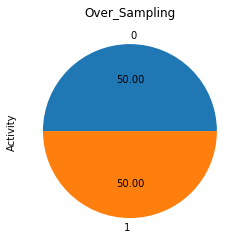

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1)
ros = x_ros , y_ros = ros.fit_resample(X_train,y_train)
ax = y_ros.value_counts().plot.pie(autopct = '%.2f')
_=ax.set_title("Over_Sampling")

In [ ]:
y_ros.value_counts()

0    1155
1    1155
Name: Activity, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)

In [ ]:
X_train_res, y_train_res = sm.fit_resample(x_ros, y_ros.ravel())

In [ ]:
X_train_res.shape

(2310, 223)

In [ ]:
y_train_res.shape

(2310,)

MODEL TRAINING

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=800, max_features="auto", random_state=42)
rf_model.fit(X_train_res, y_train_res)


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=800, random_state=42)

In [ ]:
y_test_pred = rf_model.predict(X_test)

In [ ]:
y_train_pred = rf_model.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix)

[[418  80]
 [ 65 259]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       498
           1       0.76      0.80      0.78       324

    accuracy                           0.82       822
   macro avg       0.81      0.82      0.82       822
weighted avg       0.83      0.82      0.82       822



In [ ]:
from sklearn.metrics import matthews_corrcoef
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_train

0.8723427071215657

In [ ]:
mcc_test = matthews_corrcoef(y_test, y_test_pred)
mcc_test

0.6340711232465507

In [ ]:
new_data = pd.read_csv("/content/sample_data/external descriptors.csv")

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
x = selector.fit_transform(new_data)

In [ ]:
new_data = scaler.transform(new_data)

In [ ]:
new_data_pred = rf_model.predict(new_data)

ValueError: ignored

In [ ]:
print("New data predictions:", new_data_pred)

Hyperparameter tuning

In [ ]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 44,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(max_features='sqrt',
                                                    n_estimators=1000,
                                                    random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         18

In [ ]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

ROC-AUC

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

SUPPORT VECTOR MACHINE

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
clf = svm.SVC(kernel='rbf',gamma=0.1, C=10, probability=True)
clf.fit(X_train_res, y_train_res)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       498
           1       0.81      0.66      0.73       324

    accuracy                           0.81       822
   macro avg       0.81      0.78      0.79       822
weighted avg       0.81      0.81      0.80       822



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[448  50]
 [110 214]]


In [ ]:
#makepredictions
y_train_pred= clf.predict(X_train)

In [ ]:
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_train

0.8718679223937227

In [ ]:
mcc_test = matthews_corrcoef(y_test, y_pred)
mcc_test

0.5861754888070725

Hyperparameter Tuning

In [ ]:
# Check default values
svc = SVC()
params = svc.get_params()

In [ ]:
params

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
C_range = np.logspace(-1, 1, 3)
gamma_range = np.logspace(-1, 1, 3)

In [ ]:
# Finding the best hyperparameters
params = {
    'C': C_range,
    'gamma': gamma_range.tolist()+['scale', 'auto'],
    'kernel': ['rbf','poly']
}

In [ ]:
clf = GridSearchCV(
    estimator=SVC(),
    param_grid=params,
    cv=10,
    n_jobs=5,
    verbose=1
)

In [ ]:
clf.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=5,
             param_grid={'C': array([ 0.1,  1. , 10. ]),
                         'gamma': [0.1, 1.0, 10.0, 'scale', 'auto'],
                         'kernel': ['rbf', 'poly']},
             verbose=1)

In [ ]:
clf.best_params_

{'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}

LOGISTICS REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=0.6158, penalty='l2', solver ='liblinear')
logreg.fit(X_train_res, y_train_res)

LogisticRegression(C=0.6158, solver='liblinear')

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[375 123]
 [ 79 245]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       498
           1       0.67      0.76      0.71       324

    accuracy                           0.75       822
   macro avg       0.75      0.75      0.75       822
weighted avg       0.76      0.75      0.76       822



In [ ]:
y_train_pred =logreg.predict(X_train)
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_train

0.6095012023802208

In [ ]:
mcc_test = matthews_corrcoef(y_test, y_pred)
mcc_test

0.5003925628282618

Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c= np.logspace(-4, 4, 20)

In [ ]:
grid = dict(solver=solvers,penalty=penalty,C=c)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, cv = 10, n_jobs=-1, error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [ ]:
grid_result.best_params_

{'C': 0.615848211066026, 'penalty': 'l2', 'solver': 'liblinear'}

K-nearest neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn5 = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan', weights = 'distance')
knn1 = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn5.fit(X_train_res, y_train_res)
knn1.fit(X_train_res, y_train_res)

y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_5))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83       498
           1       0.72      0.79      0.75       324

    accuracy                           0.80       822
   macro avg       0.79      0.79      0.79       822
weighted avg       0.80      0.80      0.80       822



In [ ]:
y_train_pred= knn5.predict(X_train)
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_train

0.8687777315032765

In [ ]:
mcc_test = matthews_corrcoef(y_test, y_pred_5)
mcc_test

0.5811932732272926

Hyperparameter Tuning

In [ ]:
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

In [ ]:
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
grid_search = GridSearchCV(estimator=knn5, param_grid=grid, n_jobs=-1, cv=10 , error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [ ]:
grid_result.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth= 9,criterion ='gini', min_samples_leaf=2, min_samples_split= 4)
dtc.fit(X_train_res, y_train_res)
y_pred = dtc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.74      0.78       498
           1       0.66      0.78      0.71       324

    accuracy                           0.75       822
   macro avg       0.75      0.76      0.75       822
weighted avg       0.77      0.75      0.76       822



In [ ]:
y_train_pred= dtc.predict(X_train)
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_train

0.6945088951732873

In [ ]:
mcc_test = matthews_corrcoef(y_test, y_pred)
mcc_test

0.5062859316309487

Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:

# Define the parameter grid to search over
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

# Create the grid search object
dt_grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=10)

# Fit the grid search object to the data
dt_grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', dt_grid_search.best_params_)

# Print the best cross-validation score
print('Best cross-validation score:', dt_grid_search.best_score_)


ROC AUC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
#probabilities prediction
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf_model.predict_proba(X_test)
logreg_probs = logreg.predict_proba(X_test)
knn1_probs = knn1.predict_proba(X_test)
dtc_probs = dtc.predict_proba(X_test)
clf_probs = clf.predict_proba(X_test)


In [ ]:
#prediction for the positive outcome is kept
rf_probs = rf_probs[:, 1]
logreg_probs = logreg_probs[:, 1]
knn1_probs = knn1_probs[:, 1]
dtc_probs = dtc_probs[:, 1]
clf_probs = clf_probs[:, 1]

In [ ]:
#calculate ROC curve
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
knn1_fpr, knn1_tpr, _ = roc_curve(y_test, knn1_probs)
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_probs)
clf_fpr, clf_tpr, _ = roc_curve(y_test, clf_probs)
     

In [ ]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
logreg_auc = roc_auc_score(y_test, logreg_probs)
knn1_auc = roc_auc_score(y_test, knn1_probs)
dtc_auc = roc_auc_score(y_test, dtc_probs)
clf_auc = roc_auc_score(y_test, clf_probs)
     

In [ ]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Logreg: AUROC = %.3f' % (logreg_auc))
print('KNN: AUROC = %.3f' % (knn1_auc))
print('Decision Tree: AUROC = %.3f' % (dtc_auc))
print('SVM: AUROC = %.3f' % (clf_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.884
Logreg: AUROC = 0.819
KNN: AUROC = 0.788
Decision Tree: AUROC = 0.805
SVM: AUROC = 0.846


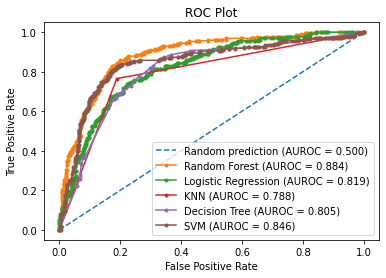

In [ ]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % logreg_auc)
plt.plot(knn1_fpr, knn1_tpr, marker='.', label='KNN (AUROC = %0.3f)' % knn1_auc)
plt.plot(dtc_fpr, dtc_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dtc_auc)
plt.plot(clf_fpr, clf_tpr, marker='.', label='SVM (AUROC = %0.3f)' % clf_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()
     
